In [1]:
from fastai.vision.all import *
from fastai.metrics import error_rate

bs = 128

path_img = 'data'

#from google.colab import drive
#drive.mount('/content/drive')

#path_img = 'drive/My Drive/code/pomodoro_tracker/data'

In [2]:
dls = ImageDataLoaders.from_folder(path_img, valid_pct=0.2, bs=bs, item_tfms=Resize(224))

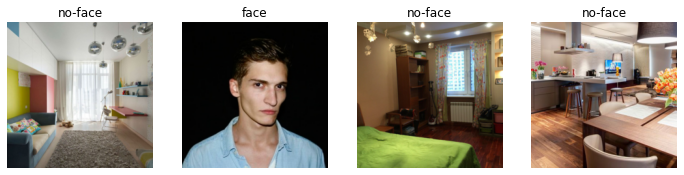

In [3]:
dls.valid.show_batch(max_n=4, nrows=1)

In [3]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time


In [5]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.100150,0.263591,0.026846,00:25


In [7]:
learn.export()

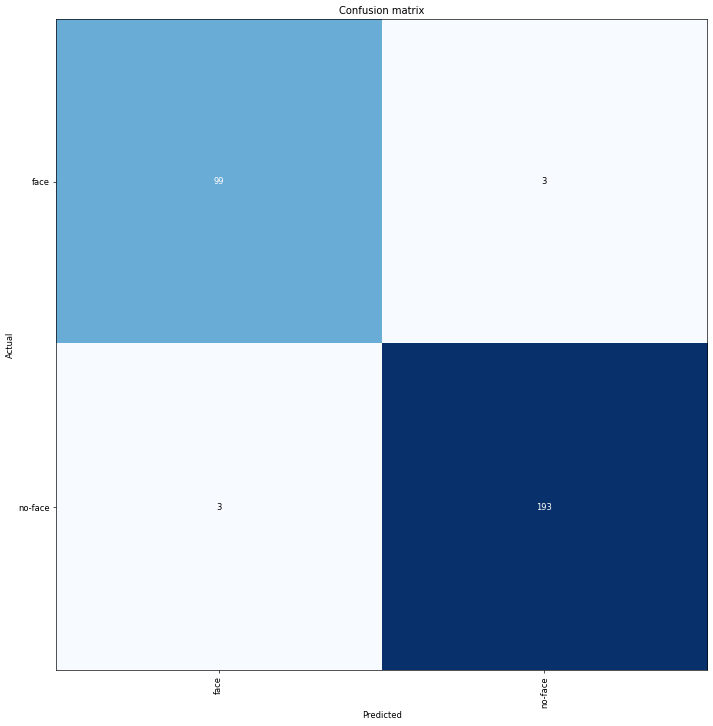

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [9]:
interp.most_confused(min_val=5)

[('no-face', 'face', 7)]

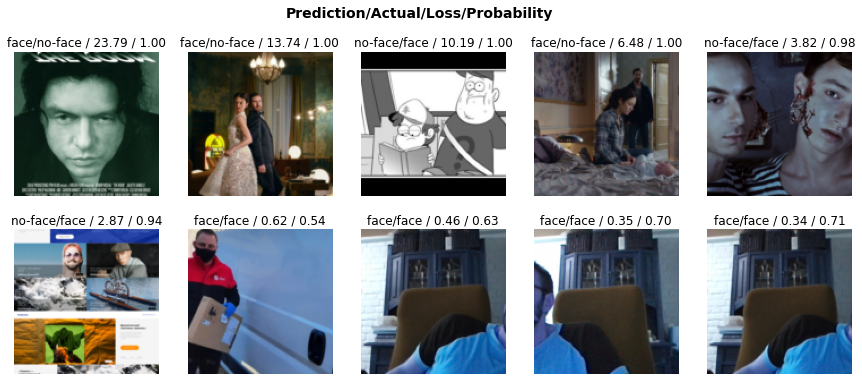

In [16]:
interp.plot_top_losses(10, nrows=2)

In [12]:
interp.print_classification_report()

              precision    recall  f1-score   support

        face       0.94      0.99      0.96       102
     no-face       0.99      0.96      0.98       196

    accuracy                           0.97       298
   macro avg       0.96      0.98      0.97       298
weighted avg       0.97      0.97      0.97       298



# Load model

In [3]:
path = Path('data/export.pkl')
learn = load_learner(path)

In [10]:
import cv2
img_path = 'frames/0-first_frame.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [11]:
learn.predict(img)

('no-face', tensor(1), tensor([0.0312, 0.9688]))